# Calculo Integral (Parte 2).
## Funciones a trozos (Piecewise functions)
### Heaviside Function (Funcion de Heaviside, o "step function", se nota como $\theta(x)$.



Heaviside function f=Piecewise((1, x > 0), (0, x < 0))


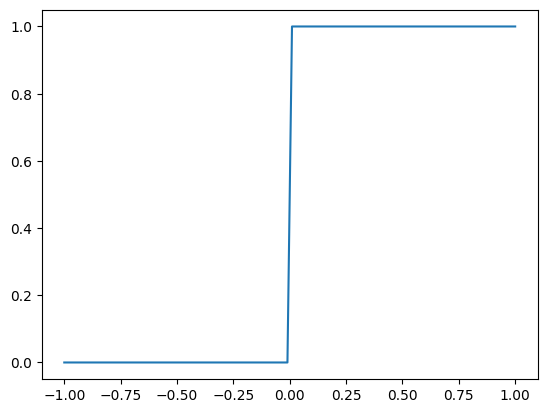

In [4]:
#the heavy side function
from sympy import Piecewise, lambdify, symbols
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x', real=True)


f = Piecewise(
    (1, x>0 ),
    (0, x < 0),
    (1/2 , x==0)
)

print(f"Heaviside function f={f}")

# graficar
domain = np.linspace(-1,1,100)
g = lambdify(x, f)

plt.plot(domain, g(domain))


In [6]:
g(0) #nan=not a number

array(nan)

### Actividad 1.  Por que la funcion no esta bien definida en $x=0$. Arreglela.

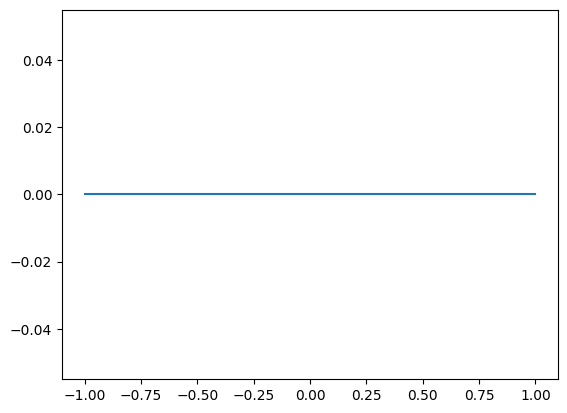

In [7]:
from sympy import diff
dfdx = diff(f,x)
dfdxl = lambdify(x, dfdx)

plt.plot(domain, dfdxl(domain))

In [9]:
# usemos las librerias de Heaviside y DiracDelta de Sympy
from sympy import symbols, diff, Heaviside, DiracDelta

# definimos simbolos
x = symbols('x')

# Heaviside
H = Heaviside(x)
# derivadas
derivative = diff(H, x)

print("Derivada de la Heaviside", derivative)

# directamente
delta_function = DiracDelta(x)

print("Dirac Delta function", delta_function)

Derivada de la Heaviside DiracDelta(x)
Dirac Delta function DiracDelta(x)


In [10]:
derivative == delta_function

True

In [11]:
Heaviside == g

False

In [12]:
display(H)

Heaviside(x)

In [13]:
display(f)

Piecewise((1, x > 0), (0, x < 0))

In [18]:
[g(x) for x in range(-10,10)]

[array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(nan),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.)]

In [19]:
Hl = lambdify(x, H, "numpy")
Hl

<function _lambdifygenerated(x)>

In [20]:
[Hl(x) for x in range(-10,10)]

[array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.5),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.)]

### Actividad 2: Grafique la funcion DiracDelta, o una aproximaccion.

In [23]:
from sympy import integrate
relu = integrate(Heaviside(x),x)
display(relu)

x*Heaviside(x)

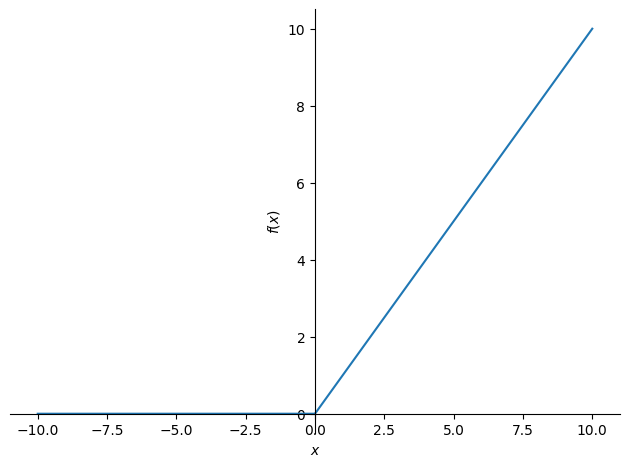

In [24]:
# grafiquemos sin usar lambdify
from sympy.plotting import plot
plot(relu)

## SymPy tiene limitaciones
Por ejemplo:
Calcule

$$\int \sqrt{\tan{x}} dx .$$

In [26]:
import sympy as sp
integrate(sp.sqrt(sp.tan(x)),x)

Integral(sqrt(tan(x)), x)

[WolframAlpha la hace](https://www.wolframalpha.com/input?i=int%28+sqrt%28tan%28x%29%29%2Cx%29)

Ver la discusion en:
[issue with integration](https://code.google.com/archive/p/sympy/issues/3952)

[Symbolab](https://www.symbolab.com/solver/integral-calculator/integral%20%5Cint%20sqrt(tan(x))?or=gms)  lo puede hacer, paso-a-paso.


Maxima tambien lo puede hacer. Aca estan las intrucciones.
```
integrate(sqrt(tan(x),x);
diff(%,x)
ratsimp(%);
trigsimp(%);

```
[Caso que abri en StackOverflow](https://stackoverflow.com/questions/78212949/sympy-cannot-integrate-sqrttanx).


## Integrales definidas que producen un escalar.
Son integrales de la forma $\int_a^b f(x) dx $.

Por ejemplo

$$\int_0^1 \frac{\mathrm{e}^x}{\sqrt{\mathrm{e}^{2x} + 9}} .$$




In [28]:
f = integrate( sp.exp(x)/sp.sqrt(sp.exp(2*x) + 9), (x, 0, 1))
f

-asinh(1/3) + asinh(E/3)

In [29]:
# evaluemos con N
from sympy import N
N(f)

0.485939520130385

## Integrales definidas pero que son funciones de una variable en el integrando.

El ejemplo que mas me gusta es la funcion Gamma


$$\Gamma(x) = \int_0^{\infty} t^{x-1} \mathrm{e}^{-t} dt .$$

In [31]:
from sympy import oo # esto es infinito
t = symbols('t')
gamma = integrate( t**(x-1)*sp.exp(-t), (t, 0, oo))
gamma

Piecewise((gamma(x), re(x) > 0), (Integral(t**(x - 1)*exp(-t), (t, 0, oo)), True))

In [33]:
# evitemos la rama para re(x)<0
z = symbols('z', positive=True)
gamma = integrate( t**(z-1)*sp.exp(-t), (t, 0, oo))
gamma

gamma(z)

In [37]:
gammal = lambdify(z, gamma, "numpy")
gammal(3)

2.0

In [39]:
gammal(6)

120.0

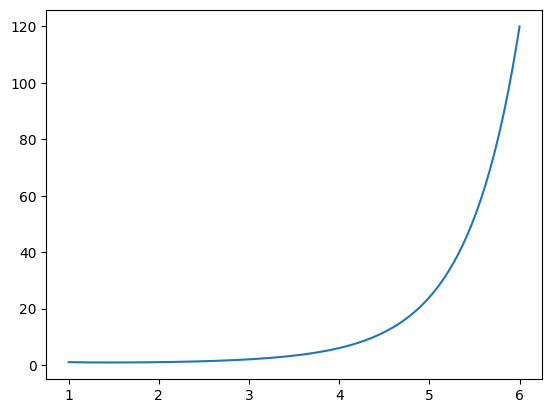

In [41]:
# graficamos
import matplotlib.pyplot as plt
import numpy as np
domain = np.linspace(1, 6, 200)
f2 = np.vectorize(gammal)

plt.plot(domain, f2(domain))

## Integrales definidas con variable en los indices de integracion.
La clasica es logaritmo.

$$\log t = \int_1^t \frac{dx}{x}  .$$

Otro ejemplo

$$\int_1^t x^{10} \mathrm{e}^x dx .$$

In [42]:
# Veamos el logaritmo
from sympy import log
myLog = integrate(1/x, (x, 1, t))
log == myLog

False

In [44]:
log(t) == myLog

True

In [46]:
# segundo ejemplo
t= symbols('t')
f = integrate( x**10*sp.exp(x), (x, 1, t))
f

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

### Integrales que no tiene solucion analitica
* Gaussianas
* Fresnel
* Elipticas


#### Gaussianas
Por ejemplo

$$ \int_a^b \mathrm{e}^{-x^2} dx .$$

#### Fresnel
Por ejemplo

$$\int_a^b \cos x^2  dx .$$

#### Elipticas
Por ejemplo

$$K(m) = \int_0^{\pi/2} \frac{1}{\sqrt{1 - m \sin^2 \theta}} d \theta.$$

In [47]:
# gaussianas err(x)
I = integrate(sp.exp(-x**2), (x, 0, 1))
I

sqrt(pi)*erf(1)/2

In [48]:
I.evalf()

0.746824132812427

In [50]:
# otra forma de evaluar usando cuadraturas
from scipy.integrate import quad
expNum = lambdify(x, sp.exp(-x**2))
quad(expNum, 0, 1)

(0.7468241328124271, 8.291413475940725e-15)

In [51]:
# fresnel
I = integrate(sp.cos(x**2), (x, 0, 1))
I

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

In [52]:
m = symbols('m')
theta = symbols('theta')
Im = integrate( 1/ sp.sqrt(1 - m*(sp.sin(theta))**2), (theta, 0, sp.pi/2))
Im

elliptic_k(m)

### Actividad 3
Explique los simbolos $C$ y $K$.

In [53]:
Im.subs(m,6).evalf()

0.670832419398971 - 0.955503927064044*I

## Integrales impropias.
Tienen singularidades en el integrando
Por ejemplo


$$ \int_1^2 \frac{dx}{\sqrt{(x-1)^{1/3}}} .$$

In [55]:
from sympy import Rational
f = 1/(x-1)**(Rational(1,3))
f

(x - 1)**(-1/3)

In [57]:
fint = integrate(f, (x, 1, 2))
fint

3/2

In [58]:
# integrales con infinitos
# log
integrate(1/x, (x, 1, oo))

oo

In [59]:
integrate( 1/(x**2 + 1), (x, -oo, oo))

pi

## Series
Finitas e infinitas
Ejemplo

$$\sum_{k=10^7}^{2 \times 10^7} \frac{1}{k} .$$

In [62]:
from sympy import Sum, symbols
k = symbols('k')
s =Sum(1/k, (k, 10000000, 20000000))
s

Sum(1/k, (k, 10000000, 20000000))

In [63]:
s.evalf()

0.693147255559946

In [64]:
# otro ejemplo
S = Sum(6/4**k, (k, 0, oo))
S

Sum(6/4**k, (k, 0, oo))

In [65]:
S.doit()

8

Otro ejemplo tomado de Mr. P. Solver.

$$\sum_{n=1}^{\infty} \frac{\arctan(n)}{n^{1.1}} .$$



In [68]:
n=symbols('n')
s = Sum(sp.atan(n)/n**Rational(11,10), (n, 1, oo))
s

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [70]:
s.doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [71]:
s.n()

15.3028821020457

## Formula de Ramanujan para pi
De acuerdo a Ramanujan

$$\pi = \frac{9801}{\sqrt{8} \sum_{n=0}^{\infty} (4n)! (1103 + 26390 n)/n!^4 396^{4n}} .$$

In [73]:
from sympy import factorial, N
f= factorial
n= symbols('n')
R = 9801/sp.sqrt(8)/Sum(f(4*n)*(1103+26390*n)/f(n)**4/396**(4*n),(n,0,oo))
N(R, 1000)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

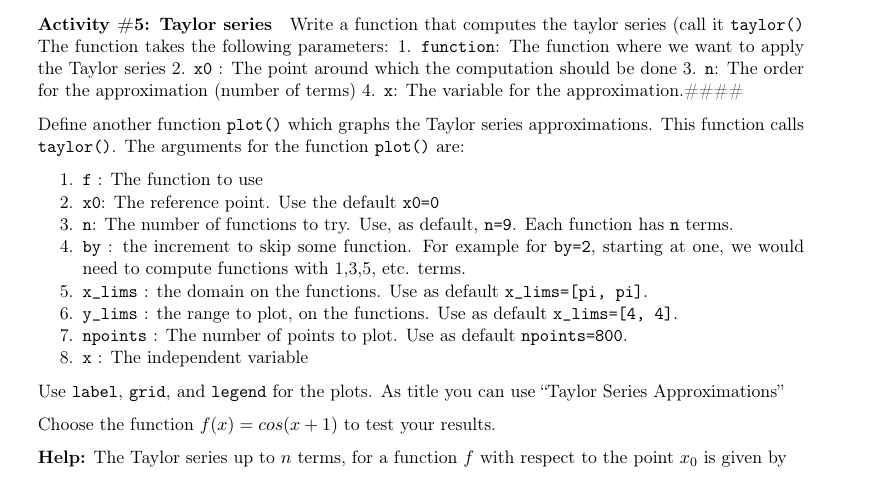

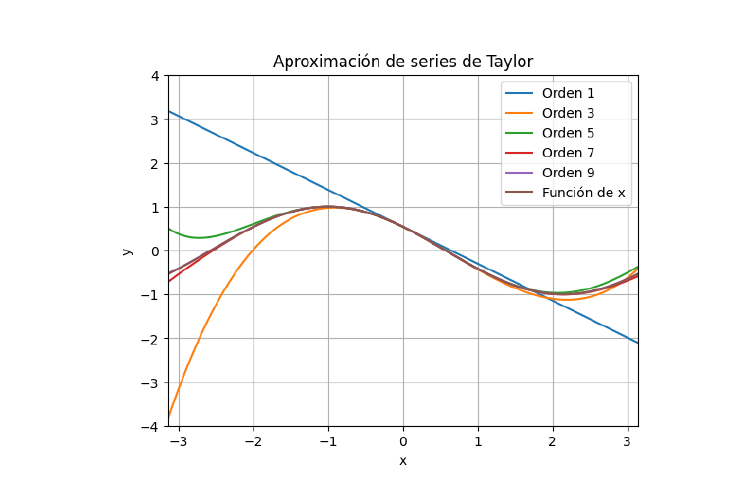

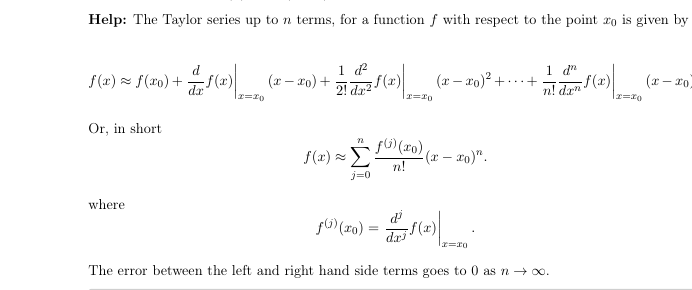